In [114]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve

df = pd.read_csv('./heart.csv')
print(df.head(5))
print(df.shape)

   Age  Sex  ChestPain  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  \
0   63    1          3        145          233          1           0    150   
1   37    1          2        130          250          0           1    187   
2   41    0          1        130          204          0           0    172   
3   56    1          1        120          236          0           1    178   
4   57    0          0        120          354          0           1    163   

   ExerciseAngina  OldPeak  Slope  OxygenSaturation  Target  
0               0      2.3      0              98.6       1  
1               0      3.5      0              98.6       1  
2               0      1.4      2              98.6       1  
3               0      0.8      2              98.6       1  
4               1      0.6      2              98.1       1  
(2518, 13)


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               2518 non-null   int64  
 1   Sex               2518 non-null   int64  
 2   ChestPain         2518 non-null   int64  
 3   RestingBP         2518 non-null   int64  
 4   Cholesterol       2518 non-null   int64  
 5   FastingBS         2518 non-null   int64  
 6   RestingECG        2518 non-null   int64  
 7   MaxHR             2518 non-null   int64  
 8   ExerciseAngina    2518 non-null   int64  
 9   OldPeak           2518 non-null   float64
 10  Slope             2518 non-null   int64  
 11  OxygenSaturation  2518 non-null   float64
 12  Target            2518 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 255.9 KB


In [116]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2518.0,54.088562,9.212696,28.0,47.0,55.0,61.0,77.0
Sex,2518.0,0.726370,0.445910,0.0,0.0,1.0,1.0,1.0
ChestPain,2518.0,2.027800,1.508031,0.0,0.0,2.0,3.0,4.0
RestingBP,2518.0,131.869341,17.922027,0.0,120.0,130.0,140.0,200.0
Cholesterol,2518.0,229.190230,81.129536,0.0,203.0,234.0,273.0,603.0
FastingBS,2518.0,0.179508,0.383853,0.0,0.0,0.0,0.0,1.0
RestingECG,2518.0,0.609214,0.715198,0.0,0.0,0.0,1.0,2.0
MaxHR,2518.0,144.744639,24.665975,60.0,126.0,147.0,163.0,202.0
ExerciseAngina,2518.0,0.359412,0.479923,0.0,0.0,0.0,1.0,1.0
OldPeak,2518.0,0.997379,1.134041,-2.6,0.0,0.8,1.6,6.2


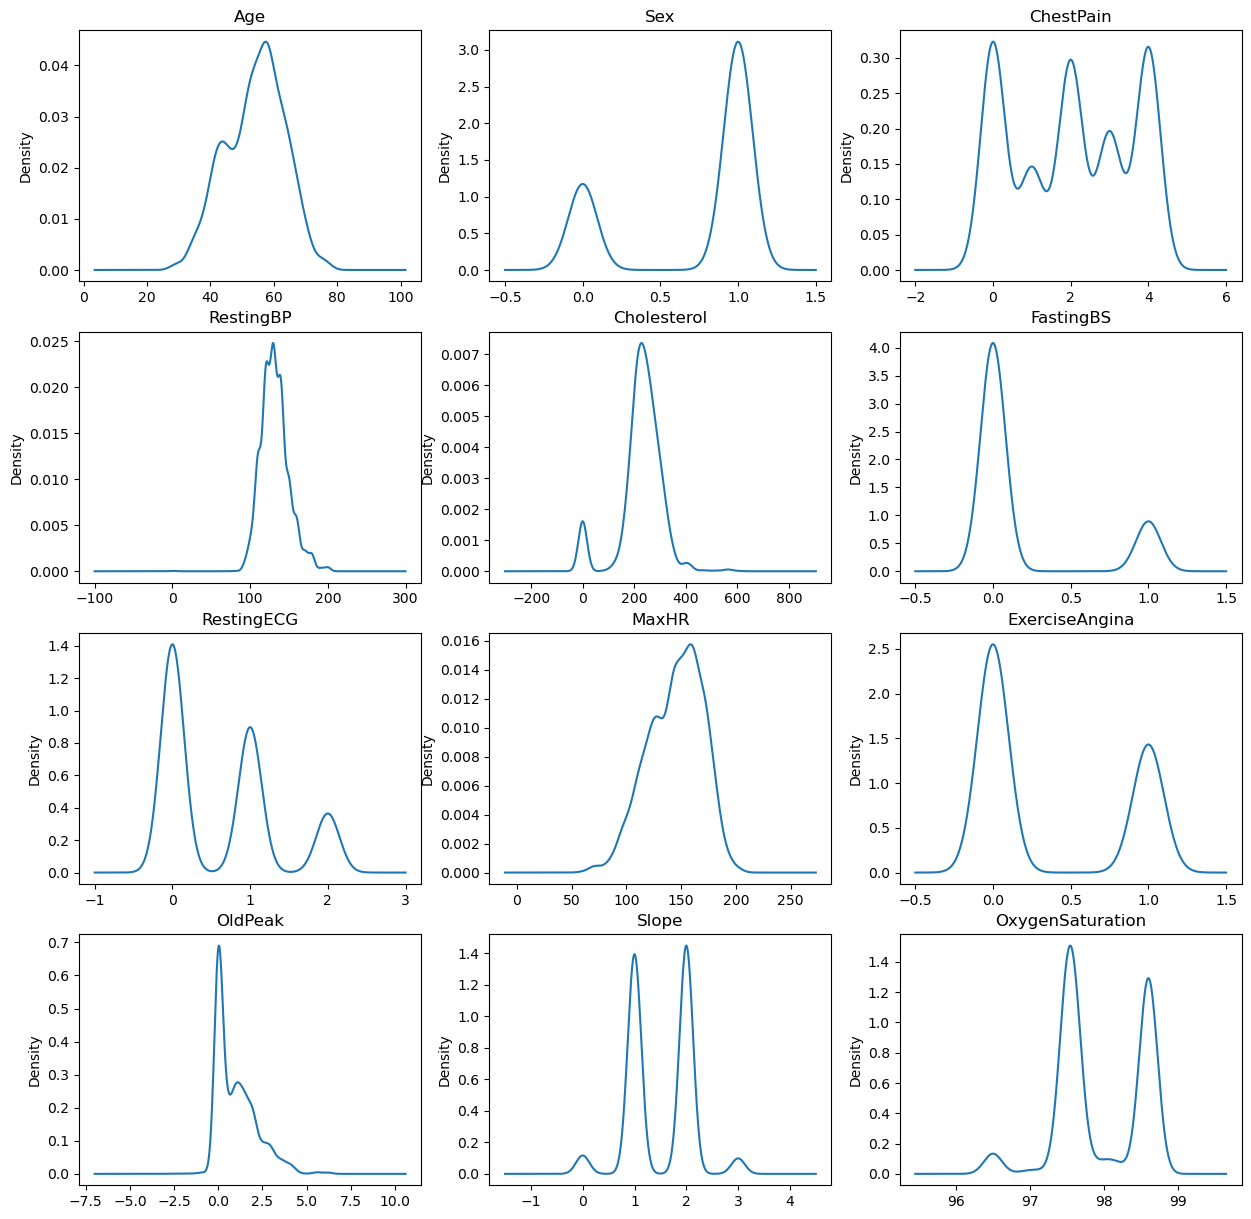

In [117]:
fig,ax = plt.subplots(4,3,figsize=(15,15))
row = col = 0
for n,i in enumerate(df.columns[:-1]):
    if (n%3 == 0) & (n>0):
        row+=1
        col = 0
    df[i].plot(kind='kde',ax=ax[row,col])
    ax[row,col].set_title(i)
    col+=1

In [118]:
duplicates = df.duplicated()

print("\nSummary of duplicates (all columns):")
print(duplicates.value_counts())

duplicate_rows = df[df.duplicated()]
print("\nDuplicate rows:")
print(duplicate_rows)

df_cleaned = df.drop_duplicates()
print("\nDataFrame with duplicates removed:")
print(df_cleaned.head(5))

null_values = df_cleaned.isnull().sum()
print("\nSummary of null values in each column:")
print(null_values)

df_cleaned = df_cleaned.dropna()
print("\nDataFrame with null values removed:")
print(df_cleaned.head(5))

print(df_cleaned.shape)


Summary of duplicates (all columns):
False    1930
True      588
Name: count, dtype: int64

Duplicate rows:
      Age  Sex  ChestPain  RestingBP  Cholesterol  FastingBS  RestingECG  \
164    38    1          2        138          175          0           1   
466    49    0          2        110          208          0           0   
1191   67    1          4        160          286          0           2   
1193   37    1          3        130          250          0           0   
1194   41    0          2        130          204          0           2   
...   ...  ...        ...        ...          ...        ...         ...   
2513   59    1          1        140          221          0           1   
2514   60    1          0        125          258          0           0   
2515   47    1          0        110          275          0           0   
2516   50    0          0        110          254          0           0   
2517   54    1          0        120          188      

<Axes: >

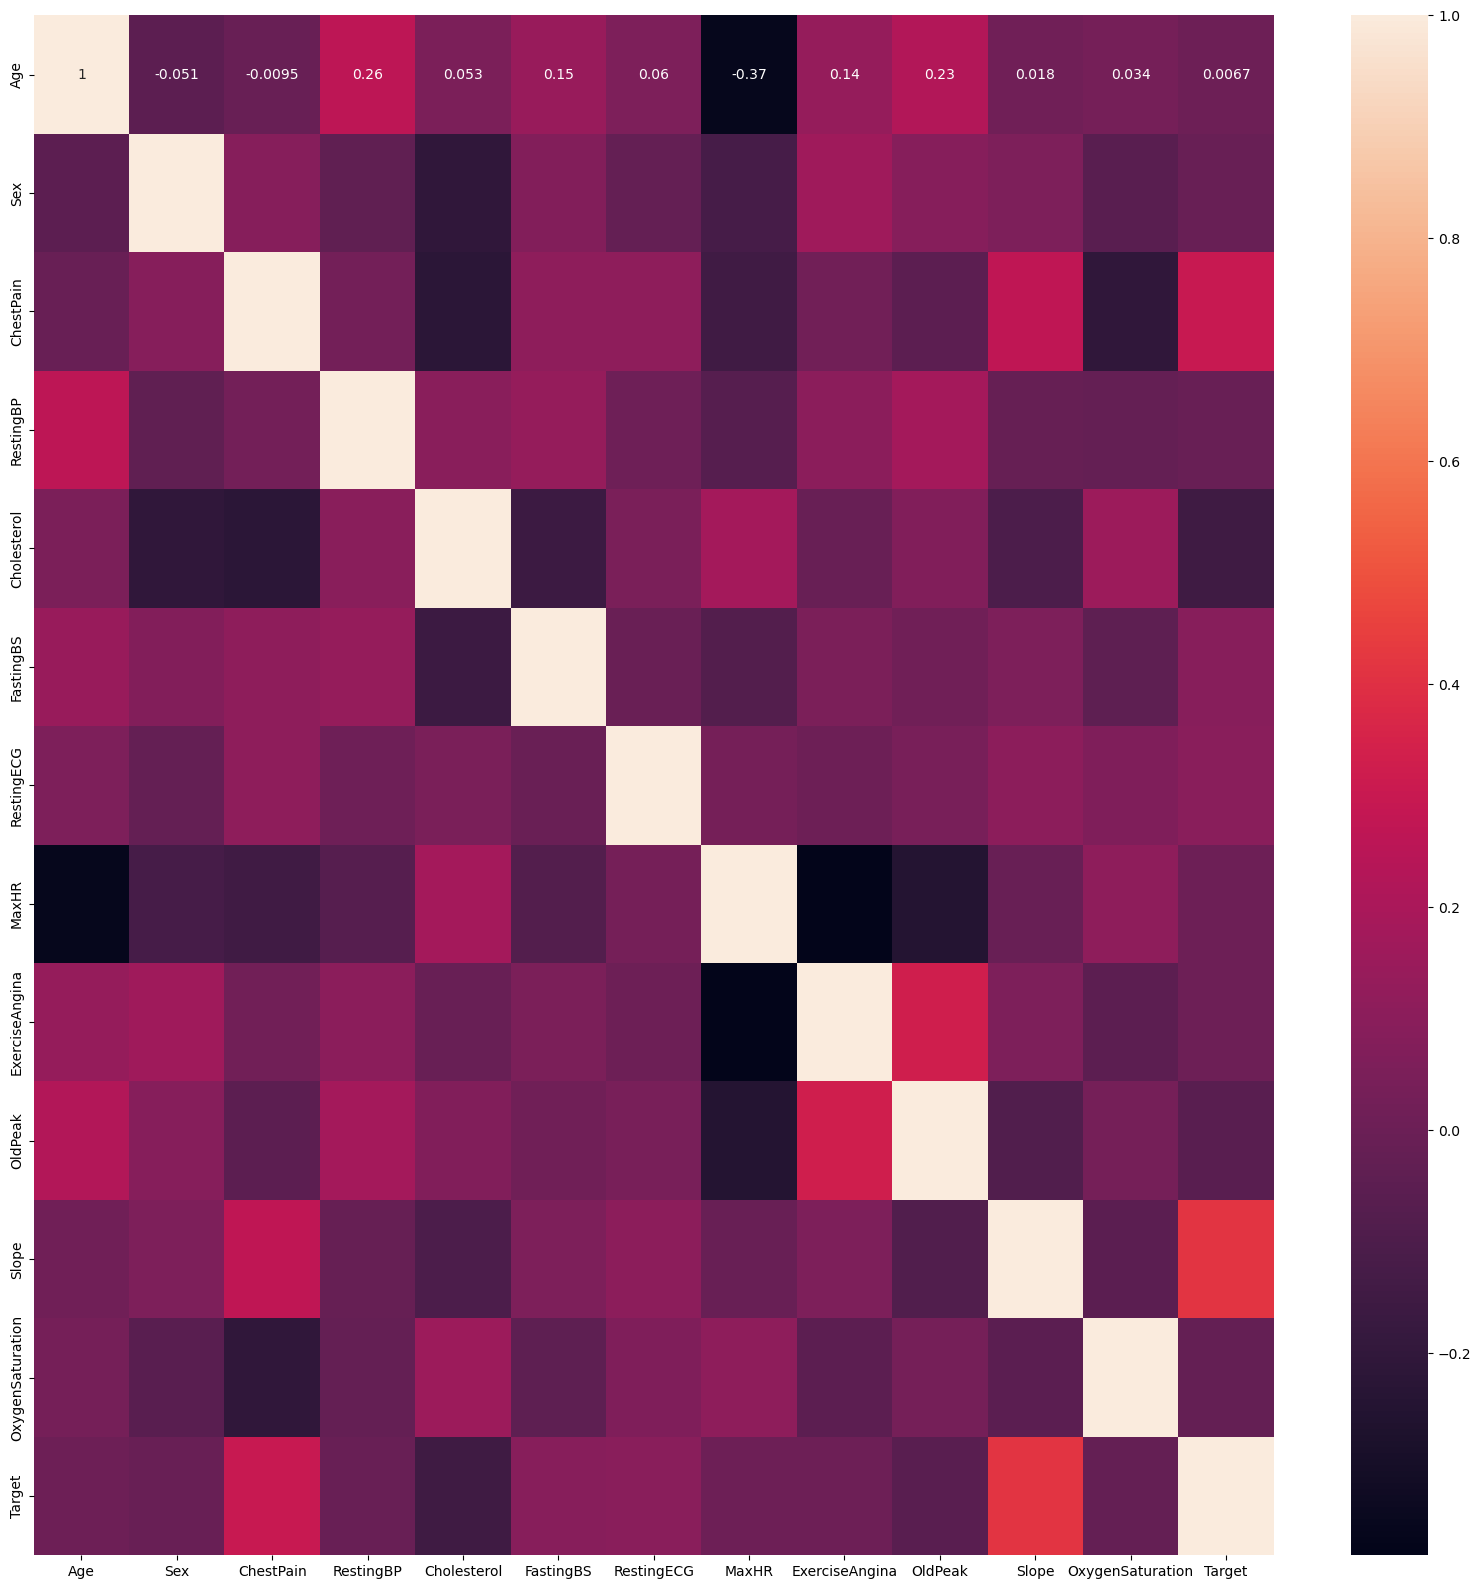

In [133]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

In [120]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [121]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, test_size=0.25, random_state=42)

In [122]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [123]:
classifier = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [124]:
y_pred = classifier.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print('Confusion Matrix:\n', cm)
print('Accuracy:', accuracy)
print('Classification Report:\n', report)

Confusion Matrix:
 [[277  20]
 [  8 325]]
Accuracy: 0.9555555555555556
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       297
           1       0.94      0.98      0.96       333

    accuracy                           0.96       630
   macro avg       0.96      0.95      0.96       630
weighted avg       0.96      0.96      0.96       630



In [125]:
cv_scores = cross_val_score(classifier, x, y, cv=10)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-Validation Scores: [0.99206349 0.94047619 0.86111111 0.92460317 0.90079365 0.95238095
 0.99603175 1.         1.         0.98804781]
Mean CV Accuracy: 0.955550812622526


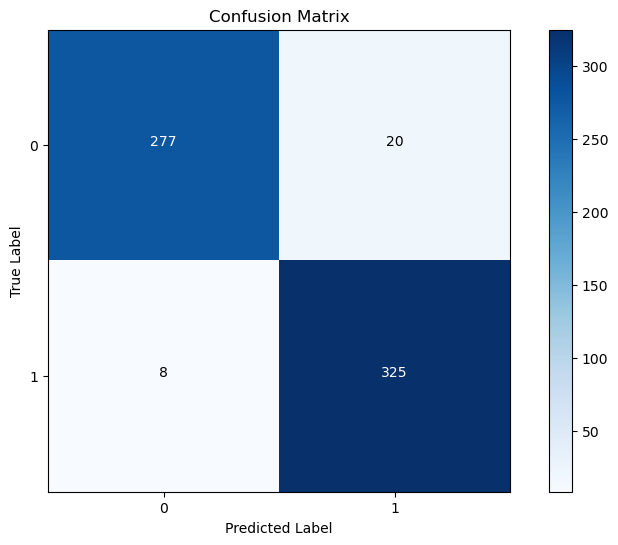

In [126]:
classes = ["0", "1"]

plt.figure(figsize=(10, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

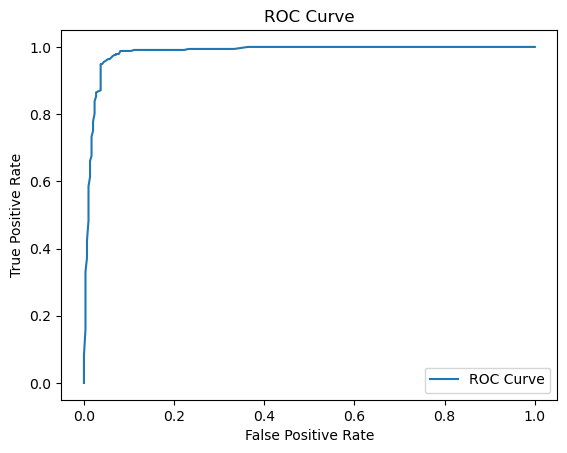

AUC Score: 0.9835441502108169


In [127]:
y_probs = classifier.predict_proba(x_test)
y_probs = y_probs[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

auc = roc_auc_score(y_test, y_probs)
print("AUC Score:", auc)

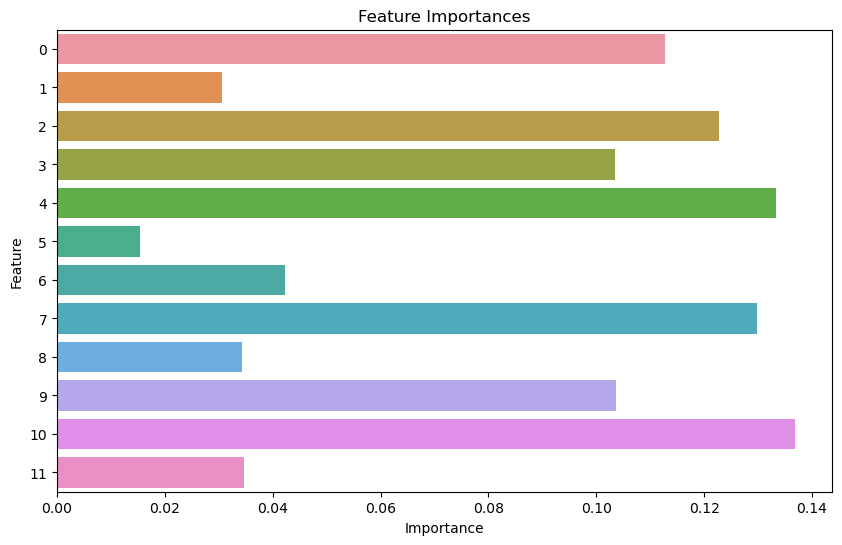

Feature ranking:
1. feature 10 (0.136874)
2. feature 4 (0.133365)
3. feature 7 (0.129776)
4. feature 2 (0.122843)
5. feature 0 (0.112724)
6. feature 9 (0.103575)
7. feature 3 (0.103474)
8. feature 6 (0.042280)
9. feature 11 (0.034654)
10. feature 8 (0.034375)
11. feature 1 (0.030638)
12. feature 5 (0.015422)


In [128]:
feature_importances = classifier.feature_importances_

indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[indices], y=np.arange(x.shape[1])[indices], orient='h')
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

print("Feature ranking:")
for f in range(x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], feature_importances[indices[f]]))

In [129]:
print(classifier.predict(scaler.transform([[39, 1, 4, 145, 222, 1, 0, 169, 1, 2.0, 0, 96.9]])))

[1]


In [130]:
joblib.dump(classifier, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']